In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

bq_data = np.loadtxt('data/BQmat_orig.txt', delimiter=',')

In [2]:
#a
np.sum(bq_data, axis=0)

array([0.01214584, 0.00817072, 0.01590964, 0.0139963 , 0.01383075,
       0.06927237, 0.86667437])

In [3]:
np.sum(bq_data)

1.0

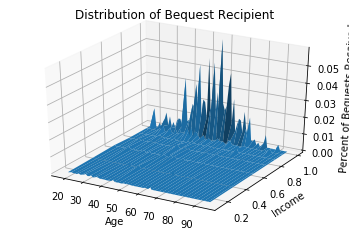

In [16]:
BQ_mat = bq_data / 1.0
age_vec = np.arange(18, 96)
prcntl = np.array([0.25, 0.25, 0.20, 0.10, 0.10, 0.09, 0.01])
prcntl_mdpts = np.array([0.125, 0.375, 0.60, 0.75, 0.85, 0.94, 0.995])
income_mat, age_mat = np.meshgrid(prcntl_mdpts, age_vec)
fig = plt.figure()
ax = fig.add_subplot(111, projection ='3d')
ax.plot_surface(age_mat, income_mat, BQ_mat)
ax.set_title('Distribution of Bequest Recipient')
ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Percent of Bequests Received')
plt.show()

In [17]:
#b
from scipy.stats import gaussian_kde

bq_matrix = np.zeros((78*7,3))
for i in range(78):
    bq_matrix[7*i:7*(i+1),0] = i+18
    for j in range(7):
        bq_matrix[7*i+j,1] = j
for k in range(78*7):
    idx1 = int(bq_matrix[k,0]-18)
    idx2 = int(bq_matrix[k,1])
    bq_matrix[k,2] = bq_data[idx1,idx2]
for k in range(1,78*7):
    bq_matrix[k,2] += bq_matrix[k-1,2]
for i in range(78):
    for j in range(7):
        bq_matrix[7*i+j,1] = prcntl_mdpts[j]

In [21]:
ages_vec = np.arange(18, 96)
abils_midpt = np.array([0.125, 0.375, 0.60, 0.75, 0.85, 0.94, 0.995])
prop_mat_inc = np.sum(bq_data, axis=0)
prop_mat_age = np.sum(bq_data, axis=1)
age_probs = np.random.multinomial(70000, prop_mat_age)
income_probs = np.random.multinomial(70000, prop_mat_inc)
age_freq = np.array([])
inc_freq = np.array([])

# creating a distribution of age values
for age, num_s in zip(ages_vec, age_probs):
    vec_age_s = np.ones(num_s)
    vec_age_s *= age
    age_freq = np.append(age_freq, vec_age_s)

# creating a distribution of ability type values
for abil, num_j in zip(abils_midpt, income_probs):
    vec_abil_j = np.ones(num_j)
    vec_abil_j *= abil
    inc_freq = np.append(inc_freq, vec_abil_j)
    
data_sim =  np.vstack((age_freq, inc_freq))

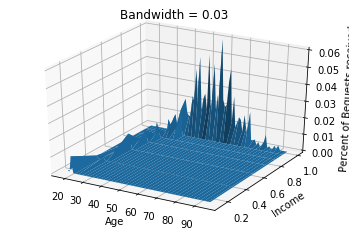

In [23]:
bw_best = 0.01
loss_best = np.inf
for i in range(20):
    bw = (i + 1) * 0.01
    kde = gaussian_kde(data_sim, bw_method = bw)
    coords = np.vstack([item.ravel() for item in [age_mat, income_mat]])
    density = np.reshape(kde(coords), age_mat.shape)
    density_scaled = density/density.sum()
    loss = ((density_scaled - BQ_mat)**2).sum()
    if loss < loss_best:
        loss_best = loss
        bw_best = bw
kde = gaussian_kde(data_sim, bw_method = bw_best)
coords = np.vstack([item.ravel() for item in [age_mat, income_mat]])
density = np.reshape(kde(coords), age_mat.shape)
density_scaled = density/density.sum()
fig = plt.figure()
ax = fig.add_subplot(111, projection ='3d')
ax.plot_surface(age_mat, income_mat, density_scaled)
ax.set_title('Bandwidth = {:.2f}'.format(bw_best))
ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Percent of Bequests received')
plt.show()

In [27]:
print("The estimated density for bequest recipients who are age 61 in the 6th lifetime income category is", density_scaled[43][5])

The estimated density for bequest recipients who are age 61 in the 6th lifetime income category is 7.910913131378526e-52
